In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [125]:
df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")

In [126]:
df.head()
#Mô tả data: bảng dữ liệu cho biết số lượng người đạp xe ở phía Tây và phía Đông của thành phố vào những thời điểm cụ thể 

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [151]:
df.index.unique()

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87586, freq=None)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          87600 non-null  object 
 1   Fremont Bridge Total          87586 non-null  float64
 2   Fremont Bridge East Sidewalk  87586 non-null  float64
 3   Fremont Bridge West Sidewalk  87586 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.7+ MB


In [128]:
df.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


In [129]:
#Lọc ra giá trị null
df[df.isnull().any(axis = 1)]

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
3794,03/10/2013 02:00:00 AM,NaN,NaN,NaN
6105,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6106,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12530,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21266,03/08/2015 02:00:00 AM,NaN,NaN,NaN
22331,04/21/2015 11:00:00 AM,NaN,NaN,NaN
22332,04/21/2015 12:00:00 PM,NaN,NaN,NaN
30170,03/13/2016 02:00:00 AM,NaN,NaN,NaN
38906,03/12/2017 02:00:00 AM,NaN,NaN,NaN
47642,03/11/2018 02:00:00 AM,NaN,NaN,NaN


In [130]:
#Thực hiện hành động trên bộ dữ liệu gốc 
df.dropna(inplace = True)

<Axes: >

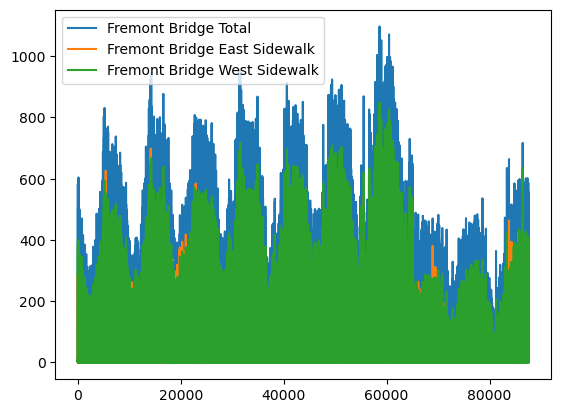

In [132]:
df.plot()

In [133]:
#Chuyển sang dạng datetime
df["Date"] = pd.to_datetime(df["Date"])

In [134]:
#chuyển cột Date sang index, thực hiện chuyển đổi trên dữ liệu gốc (inplace), xóa cột date
df.set_index("Date", inplace = True, drop = True)

In [154]:
#Lấy mẫu theo tháng và tính tổng
byMonth = df.resample("M").sum()

In [155]:
byMonth

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,65695.0,33764.0,31931.0
2012-11-30,50647.0,26062.0,24585.0
2012-12-31,36369.0,18608.0,17761.0
2013-01-31,44884.0,22910.0,21974.0
2013-02-28,50027.0,25898.0,24129.0
...,...,...,...
2022-05-31,73495.0,30052.0,43443.0
2022-06-30,85259.0,34280.0,50979.0
2022-07-31,99891.0,40807.0,59084.0


<Axes: xlabel='Date'>

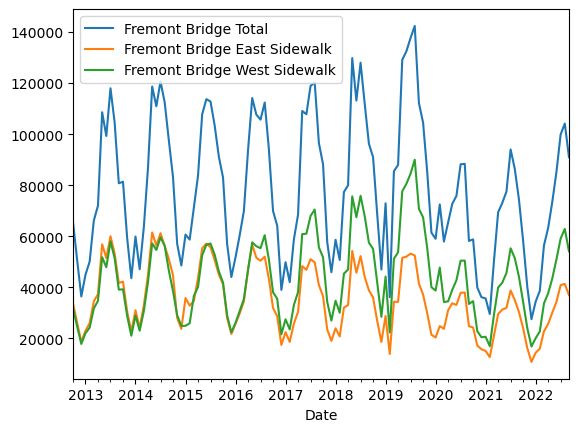

In [137]:
byMonth.plot()

- Trong những năm gần đây, từ 2017 thì phía tây có xu hướng đạp xe nhiều hơn
- Người đạp xe có xu hướng đạp xe vào mùa hè và ít hơn vào mùa đông (Xú hướng tăng lên cao vào thời điểm giữa năm, và hạ xuống thấp vào đầu và cuối năm)

In [138]:
bytime = df.groupby(df.index.time).mean()

In [139]:
bytime

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
00:00:00,10.471233,4.347123,6.124110
01:00:00,5.516712,2.414795,3.101918
02:00:00,3.609890,1.702198,1.907692
03:00:00,2.675342,1.335068,1.340274
04:00:00,6.250411,3.119726,3.130685
05:00:00,23.601644,13.752603,9.849041
06:00:00,81.357534,46.738904,34.618630
07:00:00,200.918904,120.112603,80.806301
08:00:00,283.143836,160.903562,122.240274
09:00:00,171.452727,89.241984,82.210743


In [140]:
xtime = np.array(6)*60*60*4
xtime

86400

<Axes: xlabel='time'>

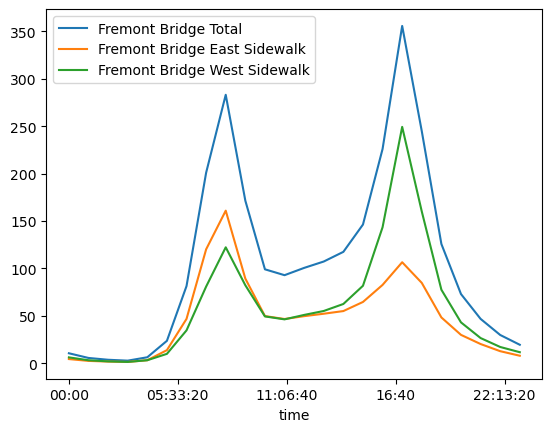

In [141]:
bytime.plot()

- Mọi người đạp xe nhiều hơn vào 7h - 9h và 16h - 17h (giờ đi làm/tan làm)
- Ít đẹp xe hơn và trưa và tối, hiếm khi đạp xe vào sáng sớm 

In [142]:
dayofweek = np.where(df.index.day_of_week < 5, "Workingday", "Weekend")
bydatetime = df.groupby(by=[dayofweek,df.index.time]).mean()

In [143]:
bydatetime


Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Weekend    00:00:00             15.148752                      6.198656   
           01:00:00              8.662188                      3.778311   
           02:00:00              5.577519                      2.539729   
           03:00:00              3.238964                      1.580614   
           04:00:00              3.560461                      1.438580   
           05:00:00              7.152591                      3.631478   
           06:00:00             16.931862                      7.659309   
           07:00:00             32.492322                     16.032630   
           08:00:00             60.086372                     30.319578   
           09:00:00             84.380998                     42.404031   
           10:00:00            105.920345                     53.835893   
           11:00:00            129.815739                     65.237044   
           12:00:00            144.705374                     72.309981   
           13:00:00            152.873321                     76.166987   
           14:00:00            158.023033                     78.531670   
           15:00:00            155.063340                     77.226488   
           16:00:00            140.891555                     69.433781   
           17:00:00            115.225528                     56.030710   
           18:00:00             88.411708                     42.951056   
           19:00:00             61.975048                     28.949136   
           20:00:00             42.657390                     19.791747   
           21:00:00             31.242802                     13.590211   
           22:00:00             21.681382                      9.517274   
           23:00:00             16.502879                      6.731286   
Workingday 00:00:00              8.602377                      3.607362   
           01:00:00              4.259969                      1.870015   
           02:00:00              2.831288                      1.370782   
           03:00:00              2.450153                      1.236963   
           04:00:00              7.325153                      3.791411   
           05:00:00             30.173696                     17.796396   
           06:00:00            107.098160                     62.352761   
           07:00:00            268.212040                    161.696702   
           08:00:00            372.264187                    213.077071   
           09:00:00            206.254699                    107.962792   
           10:00:00             96.281933                     48.037975   
           11:00:00             78.062140                     39.151899   
           12:00:00             82.873418                     40.543537   
           13:00:00             89.030291                     42.593558   
           14:00:00            101.236580                     45.579755   
           15:00:00            142.759202                     59.541794   
           16:00:00            259.970859                     87.827071   
           17:00:00            451.908742                    126.654908   
           18:00:00            307.225460                    101.391871   
           19:00:00            151.231212                     55.959356   
           20:00:00             85.019172                     33.904141   
           21:00:00             52.917178                     22.864264   
           22:00:00             32.996549                     13.919862   
           23:00:00             20.595859                      8.296396   

                     Fremont Bridge West Sidewalk  
Weekend    00:00:00                      8.950096  
           01:00:00                      4.883877  
           02:00:00                      3.037791  
           03:00:00                      1.658349  
           04:00:00                      2.121881  
           05:00:00              

<Axes: xlabel='Weekend'>

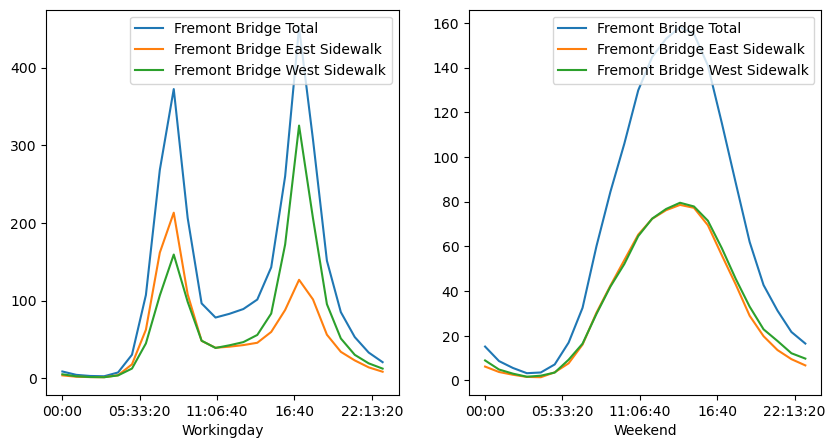

In [144]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
bydatetime.loc["Workingday"].plot(ax = ax[0], xlabel ="Workingday" )
bydatetime.loc["Weekend"].plot(ax = ax[1], xlabel ="Weekend" )


- Vào những ngày trong tuần, số lượng người đạp xe nhiều vào giờ đi làm và giờ tan làm
- Vào cuối tuần số lượng người đạp xe nhiều vào khoảng 2 - 3h chiều 

<Axes: >

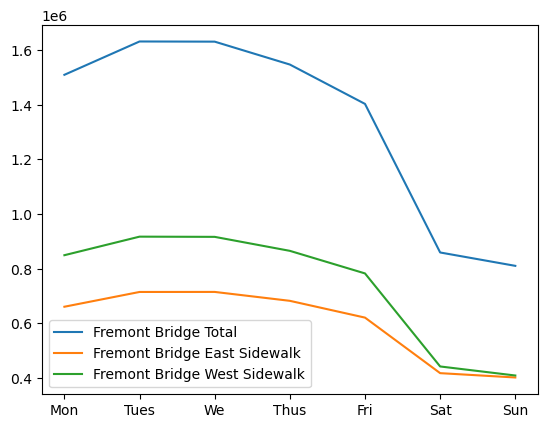

In [145]:
byweek = df.groupby(df.index.weekday).sum() #group by các ngày trong tuần và tính tổng
daylist = ["Mon","Tues","We","Thus","Fri","Sat","Sun"] #tạo daylist chứa thứ 2 đến chủ nhật
byweek.index = daylist  #thay đổi index của byweek bằng daylist
byweek.plot()

- Số lượng người đạp xe trong ngày đi làm cao hơn rõ rệt so với các ngày cuối tuần

Mô tả dữ liệu: Dữ liệu cho biết tổ số người đạp xe ở thành phố, số lượng người đạp xe ở phía tây, số lượng người đạp xe ở phía đông 
1. Xử lý giá trị null: xóa (dropna)
2. Chuyển dữ liệu ngày giờ về dạng datetime
3.Chuyển cột date về dạng index: set_index
3. Lấy mẫu theo tháng để xem xu hướng của đồ thị, cụ thể đường dữ liệu: đỉnh đáy phân bố tương đối đều, đỉnh thường ở giữa năm cho thấy số lượng người đạp xe chủ yếu vào thời điểm mùa hè. Đáy thường ở đầu và cuối năm đại diện cho mùa đông và xuân khi đó số lượng người đạp xe ít hơn
4. Tiếp tục phân tích thời gian đạp xe trong ngày. Khi đó ta thấy thời gian đạp xe chủ yếu vào khoảng 7h - 9h và từ 16h - 17h thời gian đi làm và tan làm
5. Phân tích thời gian đạp xe chủ yếu trong tuần và cuối tuần. Khi đó ta sẽ thấy trong tuần mọi người thường đạp xe và thời gian đi làm và tan làm. Còn cuối tuần mọi người thường đạp xe vào khoảng 2 - 3h chiều để đi chơi 
6. Cuối tuần hay trong tuần sẽ có xu hướng đạp xe nhiều hơn. Ta sẽ thấy mọi người có xu hướng đạp xe trong tuần nhiều hơn
